In [1]:
import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install jupyter_nbextensions_configurator
# !{sys.executable} -m jupyter nbextensions_configurator enable --user
# !{sys.executable} -m pip install jupyter_contrib_nbextensions
# !{sys.executable} -m jupyter contrib nbextension install --user
!jupyter nbextension enable codefolding/main

Enabling notebook extension codefolding/main...
      - Validating: OK


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("../")
print(os.getcwd())
# os.chdir("../data/lighting-nopadding/")

/Users/malina/Desktop/TUD/Research Project/PaymentRouting


In [3]:
class Data(object):
    def __init__(self, fee_model, base_rate, fee_rate, split_prot, tx_avg):
        self.__FEE_MODEL = fee_model
        self.__BASE_RATE = base_rate
        self.__FEE_RATE = fee_rate
        self.__SPLITTING_PROTOCOL = split_prot
        self.__TX_AVG = tx_avg
        self.__FEE_Q1 = None
        self.__FEE_Q3 = None
        self.__FEE_AV = None
        self.__FEE_MED = None
        self.__SUCCESS = None
        self.__FAILURE = None
        self.__SUCCESS_FRAC = None
        self.__FEES = []
        self.__OFFERED_FEE = None
        self.__FINAL_FEE = None
        self.__NODES = None
        self.__HOPS_AV = None
        self.__HOPS_SUCC = None
        self.__TX_VAL = None
        self.__TRIAL = None

    @property
    def TX_AVG(self):
        """I'm the 'TX_AVG' property."""
        return self.__TX_AVG

    @TX_AVG.setter
    def TX_AVG(self, value):
        self.__TX_AVG = value
              
    @property
    def TX_VAL(self):
        """I'm the 'TX_VAL' property."""
        return self.__TX_VAL

    @TX_VAL.setter
    def TX_VAL(self, value):
        self.__TX_VAL = value
              
    @property
    def FEE_MODEL(self):
        """I'm the 'FEE_MODEL' property."""
        return self.__FEE_MODEL

    @FEE_MODEL.setter
    def FEE_MODEL(self, value):
        self.__FEE_MODEL = value
        
    @property
    def BASE_RATE(self):
        """I'm the 'BASE_RATE' property."""
        return self.__BASE_RATE

    @BASE_RATE.setter
    def BASE_RATE(self, value):
        self.__BASE_RATE = value
        
    @property
    def FEE_RATE(self):
        """I'm the 'FEE_RATE' property."""
        return self.__FEE_RATE

    @FEE_RATE.setter
    def FEE_RATE(self, value):
        self.__FEE_RATE = value
        
    @property
    def SPLITTING_PROTOCOL(self):
        """I'm the 'SPLIT_PROT' property."""
        return self.__SPLITTING_PROTOCOL
    
    @SPLITTING_PROTOCOL.setter
    def SPLITTING_PROTOCOL(self, value):
        self.__SPLITTING_PROTOCOL = value
        
    @property
    def TRIAL(self):
        return self.__TRIAL

    @TRIAL.setter
    def TRIAL(self, value):
        self.__TRIAL = value
        
    @property
    def FEES(self):
        """I'm the 'FEES' property."""
        return self.__FEES

    @FEES.setter
    def FEES(self, value):
        self.__FEES = value
        
    @property
    def OFFERED_FEE(self):
        print("getter of OFFERED_FEE called")
        return self.__OFFERED_FEE

    @OFFERED_FEE.setter
    def OFFERED_FEE(self, value):
        self.__OFFERED_FEE = value
        
    @property
    def SUCCESS(self):
        """I'm the 'SUCCESS' property."""
        return self.__SUCCESS

    @SUCCESS.setter
    def SUCCESS(self, value):
        self.__SUCCESS = value
        
    @property
    def FAILURE(self):
        """I'm the 'FAILURE' property."""
        return self.__FAILURE

    @FAILURE.setter
    def FAILURE(self, value):
        self.__FAILURE = value
        
    @property
    def FEE_Q1(self):
        """I'm the 'FEE_Q1' property."""
        return self.__FEE_Q1

    @FEE_Q1.setter
    def FEE_Q1(self, value):
        self.__FEE_Q1 = value
    
    @property
    def FEE_Q3(self):
        """I'm the 'FEE_Q3' property."""
        return self.__FEE_Q3

    @FEE_Q3.setter
    def FEE_Q3(self, value):
        self.__FEE_Q3 = value
        
    @property
    def FEE_AV(self):
        """I'm the 'FEE_AV' property."""
        return self.__FEE_AV

    @FEE_AV.setter
    def FEE_AV(self, value):
        self.__FEE_AV = value
        
    @property
    def FEE_MED(self):
        """I'm the 'FEE_MED' property."""
        return self.__FEE_MED

    @FEE_MED.setter
    def FEE_MED(self, value):
        self.__FEE_MED = value
        
    @property
    def FINAL_FEE(self):
        """I'm the 'FINAL_FEE' property."""
        return self.__FINAL_FEE

    @FINAL_FEE.setter
    def FINAL_FEE(self, value):
        self.__FINAL_FEE = value
        
    @property
    def NODES(self):
        """I'm the 'NODES' property."""
        return self.__NODES

    @NODES.setter
    def NODES(self, value):
        self.__NODES = value
        
    @property
    def SUCCESS_FRAC(self):
        """I'm the 'SUCCESS_FRAC' property."""
        return self.__SUCCESS_FRAC

    @SUCCESS_FRAC.setter
    def SUCCESS_FRAC(self, value):
        self.__SUCCESS_FRAC = value
        
    @property
    def HOPS_AV(self):
        """I'm the 'HOPS_AV' property."""
        return self.__HOPS_AV

    @HOPS_AV.setter
    def HOPS_AV(self, value):
        self.__HOPS_AV = value
        
    @property
    def HOPS_SUCC(self):
        """I'm the 'HOPS_SUCC' property."""
        return self.__HOPS_SUCC

    @HOPS_SUCC.setter
    def HOPS_SUCC(self, value):
        self.__HOPS_SUCC = value
        
#     def __str__(self):
#         return self.TX_VAL

In [5]:
# root = os.getcwd()
# drcts = os.listdir(root)
# for drc in drcts:
#     if drc != ".DS_Store":
#         print(drc)
#         curr = os.listdir(root+'/'+drc)
        
#         for d in curr:
#             print(d, "\n")


root = os.getcwd()
all_files = os.listdir(root)
files = filter(lambda x: x[-4:] == '.txt', all_files)
params =["TX_AVG","TX_VAL","TRIAL","FEES","OFFERED_FEE","FINAL_FEE","NODES",
         "SUCCESS","FAILURE", "FEE_Q1", "FEE_Q3", "FEE_AV", "FEE_MED", "SUCCESS_FRAC", "HOPS_AV", "HOPS_SUCC"]
params_txt = ["FEE_MODEL", "SPLITTING_PROTOCOL", "SUCCESS", "FAILURE"]
split_protocols = ["CLOSEST NEIGHBOR", "SPLIT CLOSEST", "SPLIT IFNECESSARY"]
fee_models = ["RATIO_DIFF", "BASIC_FEE", "ABSOLUTE_DIFF", "LIGHTNING_FEES"]

stats = []
# for fee in fee_models:
#     for split_prot in split_protocols:
#         for param in params:
#             data[(fee,split_prot,param)] = []
data = []        

for file in files:
    if "eval" in file:
        config = file.split(";")
        fee=config[1].split("_")
        fee_model = str(fee[0] + "_" + fee[1])
#         if fee_model == "BASIC_FEE":
        if fee_model in fee_models:
            base_rate = config[1].split("_")[2]
            fee_rate = config[1].split("_")[3][:6]
            split_prot = str(config[2].split(".")[0].split("_")[0] + " " + config[2].split(".")[0].split("_")[1])
    #         idx = 0
            tx_avg = config[3].split(".txt")[0]
            dat = Data(fee_model, base_rate, fee_rate, split_prot, tx_avg)
            for line in open(file, 'r'):
                arr = []
                vals = [s for s in line.split(":")]
                if "\n" not in vals:# and "FEES" not in vals:
                    stat=vals[0]
                    values = vals[1]
                    for e in (values.split()):
                        if stat in params_txt:
                            arr.append(e)
                        else:
                            arr.append(float(e))
    #                 dat.stat = arr
                    if stat in params:
                        setattr(dat, stat, arr)
    #                 print(stat,getattr(dat,stat))
                    if stat not in stats:
                        stats.append(stat)
                    if "SUCCESS" in stat:
                        data.append(dat)
                        dat = Data(fee_model, base_rate, fee_rate, split_prot, tx_avg)
    #                     print(data[0].stat)
    #                 if "TX" in stat:
    #                     print(dat.stat)
    #                     data.append(dat)
    #                 print(stat, dat.stat)

# a = "TX_VAL"
# for d in data:
#     for attr, value in vars(d).items():
#         print(attr, '=', value)
# for st in stats:
#     for d in data:
#         print(st, getattr(d,st))

In [ ]:
# for d in data[fee_models.index("BASIC_FEE")]:
#     for attr, value in vars(d).items():
#         if "FEE_Q1" in attr:
#             print(attr, '=', value) #str(value).split("_")[0][2:] + " " + str(value).split("_")[1])

# for f in fee_models:    
# for dd in data:
#     for attr, value in vars(dd).items():
#         print(attr, value)
#         print(getattr(dd, "FEES")) #str(value).split("_")[0][2:] + " " + str(value).split("_")[1])

NameError: name 'data' is not defined

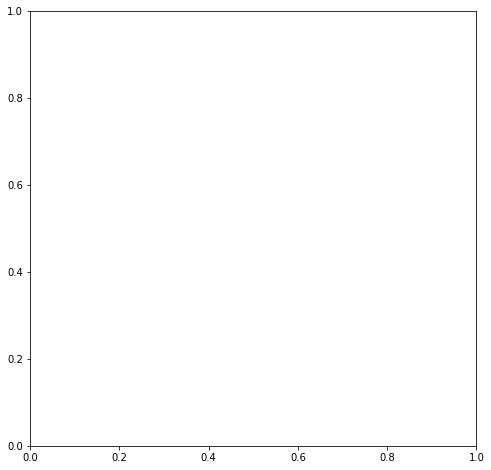

In [4]:
#     print(d, '        - ', len(data[d]))



# ax=fig.add_axes([0,0,1,1])
color= {"RATIO_DIFF":"red", "BASIC_FEE":"#9CB7CE", "ABSOLUTE_DIFF":"orange", "LIGHTNING_FEES":"#4F6171"}

fee = []
models = ["BASIC_FEE", "LIGHTNING_FEES"]
if(True):
    vig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True)
    prev_sprot = None
    nr = 0
    for d in data:
        for stat, val in vars(d).items():
            if val is not None:
#                 print(getattr(d, "TX_VAL"))
                if "__" in stat:
                    stat = stat.split("__")[1]
                txt = ""
                marker = 'o'
#                 print("TRUE" in d.FAILURE)
#                 print((d.SUCCESS)[0] == "False")
                if d.SUCCESS != None and "True" == d.SUCCESS[0]:
                    color="#B4CFDB"
                    txt="Success"
                    marker='.'
                else:
#                     print(d.SUCCESS)
                    marker='x'
                    color="#1C4353"
                    txt="Failure"
#                 if "True" == d.FAILURE:
#                     txt=val
#                     marker='x'
#                     color="blue"    
#                 else:
#                     color="#576b65"
#                     txt="successful"
                avg = 0
                if "FEES" in stat:
                    if "str" not in str(type(val)) and "float" not in str(type(val)):
                        for v in val:
                            if isinstance(v, float):
                                avg += float(v)
                        if avg != 0 and len(val) != 0:
                            val = avg/len(val)
                        else:
                            val=0
                    

                if stat in ["FEE_Q1", "FEE_Q3", "FEE_AV", "FEE_MED", "FEES"]: #"FINAL_FEE"
                    
#                     print('b-- ', val)
                    if "list" in str(type(val)):
                        val = val[0]
                    if "list" in str(type(d.TX_VAL)):
                        tx = d.TX_VAL[0]
                    else:
                        tx = d.TX_VAL
#                     print('aaa ', val)
                    if stat in ["FEE_Q1", "FEE_Q3", "FEE_AV", "FEE_MED", "FEES"]: #"FINAL_FEE"
                        if stat in ["FEES"]:
                            if tx != None:
                                plt.scatter(val, tx, marker=marker, s=35, label=str(txt), color=color)
            
                        else:
                            if "Q1" in stat or "Q3" in stat:
                                color="#5E8899"

                            if "FEE_AV" in stat or "FEE_MED" in stat:
                                color="#59B7DD"
#                             print("FEE_Q1", d.tx)
                            plt.scatter(val, d.TX_AVG, marker='+', s=50, label= stat, color=color)

    plt.legend()
    chartBox = ax.get_position()
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
    plt.xscale("log")
    plt.yscale("log")
    ax.set_xlabel('FEE VALUE')
    ax.set_ylabel('TX VALUE')
    # ax.set_title('')
    handles, labels = plt.gca().get_legend_handles_labels()
    handles, labels = zip(*[ (handles[i], labels[i]) for i in sorted(range(len(handles)), key=lambda k: list(map(str,labels))[k])] )

    by_label = dict(zip(labels, handles))
    plt.gcf().set_size_inches(15, 7)
    plt.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.51, -0.09), shadow=True, ncol=6)

    plt.show()

In [ ]:
#     print(d, '        - ', len(data[d]))



# ax=fig.add_axes([0,0,1,1])
color= {"RATIO_DIFF":"red", "BASIC_FEE":"#9CB7CE", "ABSOLUTE_DIFF":"orange", "LIGHTNING_FEES":"#4F6171"}

fee = []
models = ["BASIC_FEE", "LIGHTNING_FEES"]
if(True):
    vig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True)
    prev_sprot = None
    nr = 0
    for d in data:
        for stat, val in vars(d).items():
            if val is not None:
#                 print(getattr(d, "TX_VAL"))
                if "__" in stat:
                    stat = stat.split("__")[1]
                txt = ""
                marker = 'o'
#                 print("TRUE" in d.FAILURE)
#                 print((d.SUCCESS)[0] == "False")
                if d.SUCCESS != None and "True" == d.SUCCESS[0]:
                    color="#B4CFDB"
                    txt="Success"
                    marker='.'
                else:
#                     print(d.SUCCESS)
                    marker='x'
                    color="#1C4353"
                    txt="Failure"
#                 if "True" == d.FAILURE:
#                     txt=val
#                     marker='x'
#                     color="blue"    
#                 else:
#                     color="#576b65"
#                     txt="successful"
#                 avg = 0
#                 if "FEES" in stat:
#                     if "str" not in str(type(val)) and "float" not in str(type(val)):
#                         for v in val:
#                             if isinstance(v, float):
#                                 avg += float(v)
#                         if avg != 0 and len(val) != 0:
#                             val = avg/len(val)
#                         else:
#                             val=0
                print(d.SUCCESS_FRAC, d.TX_AVG, d.TX_VAL)
                plt.scatter(d.SUCCESS_FRAC, d.TX_AVG, marker='+', s=50, label= d.FEE_MODEL + " " + d.SPLITTING_PROTOCOL + " " + stat, color=color)
                
#                 if stat in ["FEE_Q1", "FEE_Q3", "FEE_AV", "FEE_MED", "FEES"]: #"FINAL_FEE"
                    
# #                     print('b-- ', val)
#                     if "list" in str(type(val)):
#                         val = val[0]
#                     if "list" in str(type(d.TX_VAL)):
#                         tx = d.TX_VAL[0]
#                     else:
#                         tx = d.TX_VAL
# #                     print('aaa ', val)
#                         plt.scatter(val, tx, marker=marker, s=35, label=str(txt), color=color)
            
#                         else:
#                             if "Q1" in stat or "Q3" in stat:
#                                 color="#5E8899"

#                             if "FEE_AV" in stat or "FEE_MED" in stat:
#                                 color="#59B7DD"
# #                             print("FEE_Q1", d.tx)
#                             plt.scatter(val, d.TX_AVG, marker='+', s=50, label= stat, color=color)
#                             print(d.FEE_MODEL, d.SPLITTING_PROTOCOL, d.FEE_RATE, d.BASE_RATE)

    plt.legend()
    chartBox = ax.get_position()
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
    plt.xscale("log")
    plt.yscale("log")
    ax.set_xlabel('FEE VALUE')
    ax.set_ylabel('TX VALUE')
    # ax.set_title('')
    handles, labels = plt.gca().get_legend_handles_labels()
    handles, labels = zip(*[ (handles[i], labels[i]) for i in sorted(range(len(handles)), key=lambda k: list(map(str,labels))[k])] )

    by_label = dict(zip(labels, handles))
    plt.gcf().set_size_inches(15, 7)
    plt.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.51, -0.09), shadow=True, ncol=6)

    plt.show()

None 10099.86496748646 [197.2702181862607]
None 10099.86496748646 [197.2702181862607]
None 10099.86496748646 [197.2702181862607]
None 10099.86496748646 [197.2702181862607]
None 10099.86496748646 [197.2702181862607]
None 10099.86496748646 [197.2702181862607]
None 10099.86496748646 [197.2702181862607]
None 10099.86496748646 [197.2702181862607]
None 10099.86496748646 [197.2702181862607]
None 10099.86496748646 [197.2702181862607]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.86496748646 [69.43784098564156]
None 10099.

None 10099.86496748646 [97.24569835464287]
None 10099.86496748646 [97.24569835464287]
None 10099.86496748646 [97.24569835464287]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [277.15125489059096]
None 10099.86496748646 [14.861260895119111]
None 10099.86496748646 [14.861260895119111]
None 10099.86496748646 [14.861260895119111]
None 10099.86496748646 [14.861260895119111]
None 10099.86496748646 [14.861260895119111]
None 10099.86496748646 [14.861260895119111]
None 10099.86496748646 [14.86126089

None 10099.86496748646 [34.50839204061361]
None 10099.86496748646 [34.50839204061361]
None 10099.86496748646 [34.50839204061361]
None 10099.86496748646 [34.50839204061361]
None 10099.86496748646 [34.50839204061361]
None 10099.86496748646 [34.50839204061361]
None 10099.86496748646 [34.50839204061361]
None 10099.86496748646 [34.50839204061361]
None 10099.86496748646 [60.51876034731377]
None 10099.86496748646 [60.51876034731377]
None 10099.86496748646 [60.51876034731377]
None 10099.86496748646 [60.51876034731377]
None 10099.86496748646 [60.51876034731377]
None 10099.86496748646 [60.51876034731377]
None 10099.86496748646 [60.51876034731377]
None 10099.86496748646 [60.51876034731377]
None 10099.86496748646 [60.51876034731377]
None 10099.86496748646 [60.51876034731377]
None 10099.86496748646 [90.19336493534222]
None 10099.86496748646 [90.19336493534222]
None 10099.86496748646 [90.19336493534222]
None 10099.86496748646 [90.19336493534222]
None 10099.86496748646 [90.19336493534222]
None 10099.

None 10099.86496748646 [14.407871792041218]
None 10099.86496748646 [14.407871792041218]
None 10099.86496748646 [14.407871792041218]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [48.3758257088563]
None 10099.86496748646 [38.10820216165768]
None 10099.86496748646 [38.10820216165768]
None 10099.86496748646 [38.10820216165768]
None 10099.86496748646 [38.10820216165768]
None 10099.86496748646 [38.10820216165768]
None 10099.86496748646 [38.10820216165768]
None 10099.86496748646 [38.10820216165768]
None 10099.8649674864

None 10099.86496748646 [68.96163585233715]
None 10099.86496748646 [68.96163585233715]
None 10099.86496748646 [68.96163585233715]
None 10099.86496748646 [68.96163585233715]
None 10099.86496748646 [68.96163585233715]
None 10099.86496748646 [68.96163585233715]
None 10099.86496748646 [68.96163585233715]
None 10099.86496748646 [68.96163585233715]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [31.228000934719546]
None 10099.86496748646 [12.693159277198504]
None 10099.86496748646 [12.6931592771985

None 10099.86496748646 [1.1574682659372941]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [233.33270620971982]
None 10099.86496748646 [192.96298323455548]
None 10099.86496748646 [192.96298323455548]
None 10099.86496748646 [192.96298323455548]
None 10099.86496748646 [192.96298323455548]
None 10099.86496748646 [192.96298323455548]
None 10099.86496748646 [192.96298323455548]
None 10099.86496748646 [192.96298323455548]
None 10099.86496748646 [192.96298323455548]
None 10099.86496748646 [192.9629

None 9978.763115564558 [45.366483256745205]
None 9978.763115564558 [45.366483256745205]
None 9978.763115564558 [45.366483256745205]
None 9978.763115564558 [45.366483256745205]
None 9978.763115564558 [45.366483256745205]
None 9978.763115564558 [45.366483256745205]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [41.679052326299455]
None 9978.763115564558 [15.117242750032391]
None 9978.763115564558 [15.117242750032391]
None 9978.763115564558 [15.117242750032391]
None 9978.763115564558 [15.11724

None 9978.763115564558 [198.97399987683076]
None 9978.763115564558 [198.97399987683076]
None 9978.763115564558 [198.97399987683076]
None 9978.763115564558 [198.97399987683076]
None 9978.763115564558 [198.97399987683076]
None 9978.763115564558 [198.97399987683076]
None 9978.763115564558 [198.97399987683076]
None 9978.763115564558 [198.97399987683076]
None 9978.763115564558 [198.97399987683076]
None 9978.763115564558 [32.56605472649128]
None 9978.763115564558 [32.56605472649128]
None 9978.763115564558 [32.56605472649128]
None 9978.763115564558 [32.56605472649128]
None 9978.763115564558 [32.56605472649128]
None 9978.763115564558 [32.56605472649128]
None 9978.763115564558 [32.56605472649128]
None 9978.763115564558 [32.56605472649128]
None 9978.763115564558 [32.56605472649128]
None 9978.763115564558 [32.56605472649128]
None 9978.763115564558 [378.75546997857055]
None 9978.763115564558 [378.75546997857055]
None 9978.763115564558 [378.75546997857055]
None 9978.763115564558 [378.75546997857055

None 9978.763115564558 [24.985600347444432]
None 9978.763115564558 [24.985600347444432]
None 9978.763115564558 [24.985600347444432]
None 9978.763115564558 [24.985600347444432]
None 9978.763115564558 [24.985600347444432]
None 9978.763115564558 [24.985600347444432]
None 9978.763115564558 [24.985600347444432]
None 9978.763115564558 [24.985600347444432]
None 9978.763115564558 [24.985600347444432]
None 9978.763115564558 [24.985600347444432]
None 9978.763115564558 [24.985600347444432]
None 9978.763115564558 [252.08407150698258]
None 9978.763115564558 [252.08407150698258]
None 9978.763115564558 [252.08407150698258]
None 9978.763115564558 [252.08407150698258]
None 9978.763115564558 [252.08407150698258]
None 9978.763115564558 [252.08407150698258]
None 9978.763115564558 [252.08407150698258]
None 9978.763115564558 [252.08407150698258]
None 9978.763115564558 [252.08407150698258]
None 9978.763115564558 [252.08407150698258]
None 9978.763115564558 [252.08407150698258]
None 9978.763115564558 [252.0840

None 9978.763115564558 [17.614029389144893]
None 9978.763115564558 [17.614029389144893]
None 9978.763115564558 [17.614029389144893]
None 9978.763115564558 [17.614029389144893]
None 9978.763115564558 [17.614029389144893]
None 9978.763115564558 [17.614029389144893]
None 9978.763115564558 [17.614029389144893]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [34.84523017574357]
None 9978.763115564558 [129.93129030522374]
None 9978.763115564558 [129.93129030522374]
None 9978.763115564558 [129.93129030522374]
N

None 9978.763115564558 [6.682494140559496]
None 9978.763115564558 [6.682494140559496]
None 9978.763115564558 [6.682494140559496]
None 9978.763115564558 [6.682494140559496]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [17.15890751825787]
None 9978.763115564558 [90.08720305082055]
None 9978.763115564558 [90.08720305082055]
None 9978.763115564558 [90.08720305082055]
None 9978.763115564558 [90.08720305082055]
None 9978.763115564558 [90.08720305082055]
None 9978.763115564558 [90.08720305082055]
None 9978.7

None 9978.763115564558 [558.6342209445488]
None 9978.763115564558 [558.6342209445488]
None 9978.763115564558 [558.6342209445488]
None 9978.763115564558 [558.6342209445488]
None 9978.763115564558 [558.6342209445488]
None 9978.763115564558 [558.6342209445488]
None 9978.763115564558 [154.75278321983947]
None 9978.763115564558 [154.75278321983947]
None 9978.763115564558 [154.75278321983947]
None 9978.763115564558 [154.75278321983947]
None 9978.763115564558 [154.75278321983947]
None 9978.763115564558 [154.75278321983947]
None 9978.763115564558 [154.75278321983947]
None 9978.763115564558 [154.75278321983947]
None 9978.763115564558 [154.75278321983947]
None 9978.763115564558 [154.75278321983947]
None 9978.763115564558 [1.721432834316936]
None 9978.763115564558 [1.721432834316936]
None 9978.763115564558 [1.721432834316936]
None 9978.763115564558 [1.721432834316936]
None 9978.763115564558 [1.721432834316936]
None 9978.763115564558 [1.721432834316936]
None 9978.763115564558 [1.721432834316936]
N

None 9978.763115564558 [18.065501409267426]
None 9978.763115564558 [18.065501409267426]
None 9978.763115564558 [18.065501409267426]
None 9978.763115564558 [18.065501409267426]
None 9978.763115564558 [18.065501409267426]
None 9978.763115564558 [18.065501409267426]
[0.64] 9978.763115564558 None
[0.64] 9978.763115564558 None
[0.64] 9978.763115564558 None
[0.64] 9978.763115564558 None
[0.64] 9978.763115564558 None
[0.64] 9978.763115564558 None
[0.64] 9978.763115564558 None
[0.64] 9978.763115564558 None
[0.64] 9978.763115564558 None
[0.64] 9978.763115564558 None
[0.64] 9978.763115564558 None
None 7910.638165063056 [182.0909519934609]
None 7910.638165063056 [182.0909519934609]
None 7910.638165063056 [182.0909519934609]
None 7910.638165063056 [182.0909519934609]
None 7910.638165063056 [182.0909519934609]
None 7910.638165063056 [182.0909519934609]
None 7910.638165063056 [182.0909519934609]
None 7910.638165063056 [182.0909519934609]
None 7910.638165063056 [182.0909519934609]
None 7910.638165063

None 7910.638165063056 [319.16139456107703]
None 7910.638165063056 [319.16139456107703]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [30.875076614919127]
None 7910.638165063056 [10.266497779105855]
None 7910.638165063056 [10.266497779105855]
None 7910.638165063056 [10.266497779105855]
None 7910.638165063056 [10.266497779105855]
None 7910.638165063056 [10.266497779105855]
None 7910.638165063056 [10.266497779105855]
None 7910.638165063056 [10.266497779105855]
None 7910.638165063056 [10.26649

None 7910.638165063056 [6.203493812943386]
None 7910.638165063056 [6.203493812943386]
None 7910.638165063056 [6.203493812943386]
None 7910.638165063056 [6.203493812943386]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [1.3534859284623884]
None 7910.638165063056 [33.25866692014893]
None 7910.638165063056 [33.25866692014893]
None 7910.638165063056 [33.25866692014893]
None 7910.638165063056 [33.25866692014893]
None 7910.638165063056 [33.25866692014893]
None 7910.638165063056 [33.25866692014893

None 7910.638165063056 [73.49159733995877]
None 7910.638165063056 [73.49159733995877]
None 7910.638165063056 [73.49159733995877]
None 7910.638165063056 [73.49159733995877]
None 7910.638165063056 [73.49159733995877]
None 7910.638165063056 [73.49159733995877]
None 7910.638165063056 [73.49159733995877]
None 7910.638165063056 [95.38043895717144]
None 7910.638165063056 [95.38043895717144]
None 7910.638165063056 [95.38043895717144]
None 7910.638165063056 [95.38043895717144]
None 7910.638165063056 [95.38043895717144]
None 7910.638165063056 [95.38043895717144]
None 7910.638165063056 [95.38043895717144]
None 7910.638165063056 [95.38043895717144]
None 7910.638165063056 [95.38043895717144]
None 7910.638165063056 [95.38043895717144]
None 7910.638165063056 [136.99797153715863]
None 7910.638165063056 [136.99797153715863]
None 7910.638165063056 [136.99797153715863]
None 7910.638165063056 [136.99797153715863]
None 7910.638165063056 [136.99797153715863]
None 7910.638165063056 [136.99797153715863]
None 

None 7910.638165063056 [262.04596657964595]
None 7910.638165063056 [262.04596657964595]
None 7910.638165063056 [262.04596657964595]
None 7910.638165063056 [262.04596657964595]
None 7910.638165063056 [262.04596657964595]
None 7910.638165063056 [262.04596657964595]
None 7910.638165063056 [262.04596657964595]
None 7910.638165063056 [262.04596657964595]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [28.06318773575737]
None 7910.638165063056 [18.972235535964995]
None 7910.638165063056 [18.972235535964995]
N

None 7910.638165063056 [188.5732265520586]
None 7910.638165063056 [188.5732265520586]
None 7910.638165063056 [188.5732265520586]
None 7910.638165063056 [188.5732265520586]
None 7910.638165063056 [188.5732265520586]
None 7910.638165063056 [188.5732265520586]
None 7910.638165063056 [188.5732265520586]
None 7910.638165063056 [23.63614462261003]
None 7910.638165063056 [23.63614462261003]
None 7910.638165063056 [23.63614462261003]
None 7910.638165063056 [23.63614462261003]
None 7910.638165063056 [23.63614462261003]
None 7910.638165063056 [23.63614462261003]
None 7910.638165063056 [23.63614462261003]
None 7910.638165063056 [23.63614462261003]
None 7910.638165063056 [23.63614462261003]
None 7910.638165063056 [23.63614462261003]
None 7910.638165063056 [73.93890862264686]
None 7910.638165063056 [73.93890862264686]
None 7910.638165063056 [73.93890862264686]
None 7910.638165063056 [73.93890862264686]
None 7910.638165063056 [73.93890862264686]
None 7910.638165063056 [73.93890862264686]
None 7910.6

None 7910.638165063056 [269.82017604073394]
None 7910.638165063056 [269.82017604073394]
None 7910.638165063056 [269.82017604073394]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [56.21334571954707]
None 7910.638165063056 [4.6145922349458655]
None 7910.638165063056 [4.6145922349458655]
None 7910.638165063056 [4.6145922349458655]
None 7910.638165063056 [4.6145922349458655]
None 7910.638165063056 [4.6145922349458655]
None 7910.638165063056 [4.6145922349458655]
None 7910.638165063056 [4.6145922349458655]
N

None 10099.86496748646 [180.32825665791066]
None 10099.86496748646 [180.32825665791066]
None 10099.86496748646 [380.73100573905896]
None 10099.86496748646 [380.73100573905896]
None 10099.86496748646 [380.73100573905896]
None 10099.86496748646 [380.73100573905896]
None 10099.86496748646 [380.73100573905896]
None 10099.86496748646 [380.73100573905896]
None 10099.86496748646 [380.73100573905896]
None 10099.86496748646 [380.73100573905896]
None 10099.86496748646 [380.73100573905896]
None 10099.86496748646 [380.73100573905896]
None 10099.86496748646 [44.299766225589984]
None 10099.86496748646 [44.299766225589984]
None 10099.86496748646 [44.299766225589984]
None 10099.86496748646 [44.299766225589984]
None 10099.86496748646 [44.299766225589984]
None 10099.86496748646 [44.299766225589984]
None 10099.86496748646 [44.299766225589984]
None 10099.86496748646 [44.299766225589984]
None 10099.86496748646 [44.299766225589984]
None 10099.86496748646 [44.299766225589984]
None 10099.86496748646 [44.29976

None 10099.86496748646 [68.44746829013066]
None 10099.86496748646 [68.44746829013066]
None 10099.86496748646 [68.44746829013066]
None 10099.86496748646 [68.44746829013066]
None 10099.86496748646 [68.44746829013066]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [576.3449071053309]
None 10099.86496748646 [2.671454297341334]
None 10099.86496748646 [2.671454297341334]
None 10099.86496748646 [2.671454297341334]
None 10099.86496748646 [2.671454297341334]
None 10099.86496748646 [2.671454297341334]
None 10099.

None 10099.86496748646 [93.2282081041551]
None 10099.86496748646 [93.2282081041551]
None 10099.86496748646 [93.2282081041551]
None 10099.86496748646 [93.2282081041551]
None 10099.86496748646 [93.2282081041551]
None 10099.86496748646 [93.2282081041551]
None 10099.86496748646 [93.2282081041551]
None 10099.86496748646 [17.38906439591292]
None 10099.86496748646 [17.38906439591292]
None 10099.86496748646 [17.38906439591292]
None 10099.86496748646 [17.38906439591292]
None 10099.86496748646 [17.38906439591292]
None 10099.86496748646 [17.38906439591292]
None 10099.86496748646 [17.38906439591292]
None 10099.86496748646 [17.38906439591292]
None 10099.86496748646 [17.38906439591292]
None 10099.86496748646 [17.38906439591292]
None 10099.86496748646 [288.2078716398823]
None 10099.86496748646 [288.2078716398823]
None 10099.86496748646 [288.2078716398823]
None 10099.86496748646 [288.2078716398823]
None 10099.86496748646 [288.2078716398823]
None 10099.86496748646 [288.2078716398823]
None 10099.8649674

None 10099.86496748646 [128.11223976564796]
None 10099.86496748646 [128.11223976564796]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [5.953023137158608]
None 10099.86496748646 [38.95560860427208]
None 10099.86496748646 [38.95560860427208]
None 10099.86496748646 [38.95560860427208]
None 10099.86496748646 [38.95560860427208]
None 10099.86496748646 [38.95560860427208]
None 10099.86496748646 [38.95560860427208]
None 10099.86496748646 [38.95560860427208]
None 10099.86496748646 [38.95560860427208]
None 1009

In [ ]:
# for root,dirs,files in os.walk(os.getcwd()):
#     for file in files:
#         if "_singles" in file:
#             if("ROUTE_PAYMENT" in root):
#             # print(root, '\n')
#                 path = root + '/' + file
#                 folders = path.split("/")
#                 config = folders[9]
#                 run = folders[10]
#                 protocol = folders[10]
#                 if run.isnumeric():
#                     protocol = folders[11]
#                 else:
#                     run = -1

#                 for line in open(path, 'r'):
# #                     print(path)
#                     vals = [s for s in line.split()]
#                     values = []
#                     values.append(vals[0].split('=')[0])
#                     values.append(vals[0].split('=')[1])
#                     values.extend(vals[1:])
#                     dc = [config, run, protocol, values]
# #                     print(dc, '\n')
#                     data.append(dc)
# Y = {}
# times = 21
# bp = []
# excl = []
# for idx, d in enumerate(data):
#     config=d[0]
#     run=d[1]
#     protocol=d[2]
#     p1 = "ROUTE_PAYMENT-1-false-HOP_DISTANCE-SPLIT_CLOSEST-2147483647-BASIC_FEE_0.1"
#     p2 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-SPLIT_CLOSEST-2147483647-LIGHTNING_FEES_1.0_1.0_false-4-1-false"
#     p3 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_9-CLOSEST_NEIGHBOR-2147483647-ABSOLUTE_DIFF_1.0_1.0_false-4-1-false"
#     p4 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-CLOSEST_NEIGHBOR-2147483647-RATIO_DIFF_0.05_1.0_false-4-1-false"
#     p5 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-CLOSEST_NEIGHBOR-2147483647-BASIC_FEE_0.1"
#     if True:
#         stat=d[3][0]
#         values = d[3][1:]
#         print(values)
#         if stat not in Y.keys():
#             if len(values) > 1:
#                 Y[stat+"-avg"]= values[0]
#                 Y[stat+"-med"]= values[1]
#                 Y[stat+"-min"]= values[2]
#                 Y[stat+"-max"]= values[3]
#                 Y[stat+"-sd"]= values[4]
#                 Y[stat+"-cilow"]= values[5]
#                 Y[stat+"-cihigh"]= values[6]
#             else:
#                 Y[stat] = []
#                 Y[stat] = values
#         elif len(values) > 1:
#             Y[stat+"-avg"]= values[0]
#             Y[stat+"-med"]= values[1]
#             Y[stat+"-min"]= values[2]
#             Y[stat+"-max"]= values[3]
#             Y[stat+"-sd"]= values[4]
#             Y[stat+"-cilow"]= values[5]
#             Y[stat+"-cihigh"]= values[6]
#         else:
#             Y[stat].extend(values)

# #       X = np.full(len(values), run)
#         if times > 0:
#             for st in Y.keys():
#                 st = st.split('-')[0]
#                 if st not in excl and len(values) > 1:
#                     excl.append(st)
#                     mean = float(Y[st+"-avg"])
#                     med = float(Y[st+"-med"])
#                     mmin = float(Y[st+"-min"])
#                     mmax = float(Y[st+"-max"])
#                     std = float(Y[st+"-sd"])
#                     q1 = float(Y[st+"-med"])-0.675*float(Y[st+"-sd"])
#                     q3 = float(Y[st+"-med"])+0.675*float(Y[st+"-sd"])
#                     wl = q1-1.5*(q3-q1)
#                     wh = q3+1.5*(q3-q1)
#                     stats = [{
#                         "label": 'A',  # not required
#                         "mean":  mean,  # not required
#                         "med": med,
#                         "min": mmin,
#                         "max": mmax,
#                         "std": std,
#                         "q1": q1,
#                         "q3": q3,
#                         # "cilo": 5.3 # not required
#                         # "cihi": 5.7 # not required
#                         "whislo": wl,
#                         "whishi": wh
#         #                 "fliers": []  # required if showfliers=True
#                         }]

#                     fs = 10  # fontsize

#                     fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True)
#                     bp = axes.bxp(stats,showfliers=None,showmeans=True, showcaps=True,
#                                 showbox=True,manage_ticks=True,meanline=True,
#                                 patch_artist=True,
#                                 boxprops=dict(facecolor="thistle", edgecolor="darkturquoise"),
#                                 capprops=dict(color="darkslategrey"),
#                                 whiskerprops=dict(color="darkmagenta"),
#                                 flierprops=dict(color="darkturquoise", markeredgecolor="darkturquoise"),
#                                 medianprops=dict(color="darkmagenta"))
#                     axes.set_title(protocol + "\n" + st, fontsize=fs)
#                     plt.text(1.2, mean, 'mean='+str(mean), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     plt.text(1.2, med, 'med='+str(med), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
# #                     plt.text(1.2, mmin, 'mmin', bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
# #                     plt.text(1.2, mmax, 'mmax', bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     plt.text(1.2, q1, 'q1='+str(q1), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     plt.text(1.2, q3, 'q3='+str(q3), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     ## change outline color, fill color and linewidth of the boxes
#     #                 for box in bp['boxes']:
#     #                     # change outline color
#     #                     box.set( color='#7570b3', linewidth=2)
#     #                     # change fill color
#     #                     box.set( facecolor = '#1b9e77' )

#     #                 ## change color and linewidth of the whiskers
#     #                 for whisker in bp['whiskers']:
#     #                     whisker.set(color='#7570b3', linewidth=2)

#     #                 ## change color and linewidth of the caps
#     #                 for cap in bp['caps']:
#     #                     cap.set(color='#7570b3', linewidth=2)

#     #                 ## change color and linewidth of the medians
#     #                 for median in bp['medians']:
#     #                     median.set(color='#b2df8a', linewidth=2)

#     #                 ## change the style of fliers and their fill
#     #                 for flier in bp['fliers']:
#     #                     flier.set(marker='o', color='#e7298a', alpha=0.5)

#                     plt.show()
#                     times -= 1

In [ ]:
# root = os.getcwd()
# drcts = os.listdir(root)
# for drc in drcts:
#     if drc != ".DS_Store":
#         print(drc)
#         curr = os.listdir(root+'/'+drc)
        
#         for d in curr:
#             print(d, "\n")

data = []
for root,dirs,files in os.walk(os.getcwd()):
    for file in files:
        if "_singles" in file:
            if("ROUTE_PAYMENT" in root):
            # print(root, '\n')
                path = root + '/' + file
                folders = path.split("/")
                config = folders[9]
                run = folders[10]
                protocol = folders[10]
                if run.isnumeric():
                    protocol = folders[11]
                else:
                    run = -1

                for line in open(path, 'r'):
                    vals = [s for s in line.split()]
                    values = []
                    values.append(vals[0].split('=')[0])
                    values.append(vals[0].split('=')[1])
                    values.extend(vals[1:])
                    dc = [config, run, protocol, values]
#                     print(dc, '\n')
                    data.append(dc)
Y = {}
times = 700
bp = []
excl = []
for idx, d in enumerate(data):
    config=d[0]
    run=d[1]
    protocol=d[2]
#     p1 = "ROUTE_PAYMENT-1-false-HOP_DISTANCE-SPLIT_CLOSEST-2147483647-BASIC_FEE_0.1"
#     p2 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-SPLIT_CLOSEST-2147483647-LIGHTNING_FEES_1.0_1.0_false-4-1-false"
#     p3 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_9-CLOSEST_NEIGHBOR-2147483647-ABSOLUTE_DIFF_1.0_1.0_false-4-1-false"
#     p4 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-CLOSEST_NEIGHBOR-2147483647-RATIO_DIFF_0.05_1.0_false-4-1-false"
#     p5 = "ROUTE_PAYMENT-1-false-SPEEDYMURMURS_MULTI_4-CLOSEST_NEIGHBOR-2147483647-BASIC_FEE_0.1"
    if True and run== -1:
        stat=d[3][0]
        values = d[3][1:]
#         print(len(values), path)
        if stat not in Y.keys():
            if len(values) > 1:
                Y[stat+"-avg"]= values[0]
                Y[stat+"-med"]= values[1]
                Y[stat+"-min"]= values[2]
                Y[stat+"-max"]= values[3]
                Y[stat+"-sd"]= values[4]
                Y[stat+"-cilow"]= values[5]
                Y[stat+"-cihigh"]= values[6]
            else:
                Y[stat] = []
                Y[stat] = values
        elif len(values) > 1:
            Y[stat+"-avg"]= values[0]
            Y[stat+"-med"]= values[1]
            Y[stat+"-min"]= values[2]
            Y[stat+"-max"]= values[3]
            Y[stat+"-sd"]= values[4]
            Y[stat+"-cilow"]= values[5]
            Y[stat+"-cihigh"]= values[6]
        else:
            Y[stat].extend(values)

#       X = np.full(len(values), run)
        if times > 0:
            for st in Y.keys():
                st = st.split('-')[0]
#                 print(protocol)
                if "TRANSACTIONS-200.0" in config and st not in excl and len(values) > 1 and ("ROUTE_PAYMENT_FEE_AV" in st or "ROUTE_PAYMENT_SUCCESS" in st):
#                     print(protocol)

#                     excl.append(st)
                    mean = float(Y[st+"-avg"])
                    med = float(Y[st+"-med"])
                    mmin = float(Y[st+"-min"])
                    mmax = float(Y[st+"-max"])
                    std = float(Y[st+"-sd"])
                    q1 = float(Y[st+"-med"])-0.675*float(Y[st+"-sd"])
                    q3 = float(Y[st+"-med"])+0.675*float(Y[st+"-sd"])
                    wl = q1-1.5*(q3-q1)
                    wh = q3+1.5*(q3-q1)
                    stats = [{
                        "label": 'A',  # not required
                        "mean":  mean,  # not required
                        "med": med,
                        "min": mmin,
                        "max": mmax,
                        "std": std,
                        "q1": q1,
                        "q3": q3,
                        # "cilo": 5.3 # not required
                        # "cihi": 5.7 # not required
                        "whislo": wl,
                        "whishi": wh
        #                 "fliers": []  # required if showfliers=True
                        }]

                    fs = 10  # fontsize

                    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True)
                    bp = axes.bxp(stats,showfliers=None,showmeans=False, showcaps=True,
                                showbox=True,manage_ticks=True,meanline=True,
                                patch_artist=True,
                                boxprops=dict(facecolor="thistle", edgecolor="darkturquoise"),
                                capprops=dict(color="darkslategrey"),
                                whiskerprops=dict(color="darkmagenta"),
                                flierprops=dict(color="darkturquoise", markeredgecolor="darkturquoise"),
                                medianprops=dict(color="darkmagenta"))
                    axes.set_title(protocol + "\n" + st + config, fontsize=fs)
#                     plt.text(1.2, mean, 'mean='+str(mean), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
                    plt.text(1.6, med, 'med='+str(med), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     plt.text(1.2, mmin, 'mmin', bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
#                     plt.text(1.2, mmax, 'mmax', bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
                    plt.text(1.6, q1, 'q1='+str(q1), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
                    plt.text(1.6, q3, 'q3='+str(q3), bbox=dict(facecolor='lightgray', alpha=0.2), fontsize=8)
                    ## change outline color, fill color and linewidth of the boxes
    #                 for box in bp['boxes']:
    #                     # change outline color
    #                     box.set( color='#7570b3', linewidth=2)
    #                     # change fill color
    #                     box.set( facecolor = '#1b9e77' )

    #                 ## change color and linewidth of the whiskers
    #                 for whisker in bp['whiskers']:
    #                     whisker.set(color='#7570b3', linewidth=2)

    #                 ## change color and linewidth of the caps
    #                 for cap in bp['caps']:
    #                     cap.set(color='#7570b3', linewidth=2)

    #                 ## change color and linewidth of the medians
    #                 for median in bp['medians']:
    #                     median.set(color='#b2df8a', linewidth=2)

    #                 ## change the style of fliers and their fill
    #                 for flier in bp['fliers']:
    #                     flier.set(marker='o', color='#e7298a', alpha=0.5)
                    plt.autoscale(enable=True)
                    plt.show()
                    times -= 1



In [ ]:
## HERE





# # root = os.getcwd()
# # drcts = os.listdir(root)
# # for drc in drcts:
# #     if drc != ".DS_Store":
# #         print(drc)
# #         curr = os.listdir(root+'/'+drc)
        
# #         for d in curr:
# #             print(d, "\n")


# root = os.getcwd()
# all_files = os.listdir(root)
# files = filter(lambda x: x[-4:] == '.txt', all_files)
# params =["TX_VAL","TRIAL","FEES","OFFERED_FEE","FINAL_FEE","NODES",
#          "SUCCESS","FAILURE", "FEE_Q1", "FEE_Q3", "FEE_AV", "FEE_MED", "SUCCESS_FRAC", "HOPS_AV", "HOPS_SUCC"]
# params_txt = ["FEE_MODEL", "SPLITTING_PROTOCOL", "SUCCESS", "FAILURE"]
# split_protocols = ["CLOSEST NEIGHBOR", "SPLIT CLOSEST", "SPLIT IFNECESSARY"]
# fee_models = ["RATIO_DIFF", "BASIC_FEE", "ABSOLUTE_DIFF", "LIGHTNING_FEES"]

# # for fee in fee_models:
# #     for split_prot in split_protocols:
# #         for param in params:
# #             data[(fee,split_prot,param)] = []
# # data = {}       
# # for idx in range(len(fee_models)):
# #     data[idx] = []
    
# for file in files:
#     if "eval" in file:
#         config = file.split(";")
#         fee=config[1].split("_")
#         fee_model = str(fee[0] + "_" + fee[1])
#         base_rate = config[1].split("_")[2]
#         fee_rate = config[1].split("_")[3][:6]
#         split_prot = str(config[2].split(".")[0].split("_")[0] + " " + config[2].split(".")[0].split("_")[1])
#         dat = Data(fee_model, base_rate, fee_rate, split_prot)
#         idx = 0
#         for line in open(file, 'r'):
#             arr = []
#             vals = [s for s in line.split(":")]
#             if "\n" not in vals:# and "FEES" not in vals:
#                 stat=vals[0]
#                 values = vals[1]
#                 for e in (values.split()):
#                     if stat in params_txt:
#                         arr.append(e)
#                     else:
#                         arr.append(float(e))
# #                 dat.stat = arr
#                 setattr(dat, stat, arr)
#                 print
#                 if "SUCCESS" in stat:
#                     data[fee_models.index(fee_model)].append(dat)

#                 if "TX_VAL" in stat:
#                     print(getattr(dat,stat))
# #                     print(data[0].stat)
# #                 if "TX" in stat:
# #                     print(dat.stat)
# #                     data.append(dat)
# #                 print(stat, dat.stat)



In [ ]:
# plt.figure(figsize=(12,8))    
# for st in Y.keys():
#     X = np.arange(len(Y[st]))
#     plt.plot(X, Y[st], linewidth=3, color="thistle", label=st)
#     # plt.plot(Q2, I2, linewidth=3, color="darkturquoise", label='Igor Sample intensity '+ s2.orientation)
#     # plt.plot(s1.scattering_var, s1.I_corrected, linewidth=3, color="darkslategrey",  label='Corrected intensity ' + s1.orientation)
#     # plt.plot(s2.scattering_var, s2.I_corrected, linewidth=3, color="darkmagenta",  label='Corrected intensity ' + s2.orientation)
#     plt.title(protocol)
# #     plt.xscale('log')
# #     plt.yscale('log')
#     plt.xlabel("index")
#     plt.ylabel(st)
# #   plt.xlim(0,max(values))
#     # plt.grid(True)
#     plt.legend()
#     plt.show()